# DECOY FINDING TOOL BASED ON ChEMBL BIOACTIVITY DATA:


></font><br><font color = purple>**About the notebook:** >> The effectiveness of the molecular interaction studies depends on the scoring algorithm that is involved in ranking the compounds based on several different factors. the false positive rate of lead selection depends on training the scoring function to avoid high scoring decoy molecules having very high IC50 values. Decoys are small molecules which are biologically inactive to a specific protein target. this is an attempt to find such decoy molecules for any biological protein target using and Jupyter I-python notebook and testing different scoring presets in Genetic Optimization for Ligand Docking (GOLD) algorithm.
</font><br><font color = green>**ChEMBL Database**
></font><br><font color = green>ChEMBL, also known as ChEMBLdb, is a chemical library that is manually maintained and contains bioactive compounds with drug like effects.
></font><br><font color = green>It has a collection of 14,855 biological targets, 2,157,379 unique compounds, 19,286,751 biological activity data, 84,092 published articles and 194 deposited data.

--------------------------------------------------


| URL link: [*ChEMBL Database*](https://www.ebi.ac.uk/chembl/)
| [Data as of May 29, 2022; ChEMBL version 30].


></font><br><font color = green> **Installing Essential libraries**

In [1]:

! pip install chembl_webresource_client

## **1. Importing libraries**

</font><br><font color = green> Import necessary libraries:
></font><br><font color = green> **Pandas** is an open source data analysis and manipulation tool developed on top of the Python
></font><br><font color = green> programming language that is fast, powerful, versatile, and simple to use.

In [2]:
import pandas as pd
from chembl_webresource_client.new_client import new_client

## **2. Search for Target protein**

### **2.1 Query protein name is ADAMTS-4**
></font><br><font color = red> A disintegrin and metalloproteinase with thrombospondin motifs 4 is an enzyme that in humans is encoded by the ADAMTS4 gene.


In [3]:
# Target search for Query protein or enzyme name (For example ADAMTS4):
target = new_client.target
target_query = target.search('ADAMTS4')
targets = pd.DataFrame.from_dict(target_query)
targets

,cross_references,organism,pref_name,score,species_group_flag,target_chembl_id,target_components,target_type,tax_id
0,"[{'xref_id': 'ADAMTS4', 'xref_name': None, 'xr...",Homo sapiens,ADAMTS4,19.0,False,CHEMBL2318,"[{'accession': 'O75173', 'component_descriptio...",SINGLE PROTEIN,9606
1,"[{'xref_id': 'Q9TT93', 'xref_name': None, 'xre...",Bos taurus,ADAMTS4,19.0,False,CHEMBL3874,"[{'accession': 'Q9TT93', 'component_descriptio...",SINGLE PROTEIN,9913
2,[],Rattus norvegicus,A disintegrin and metalloproteinase with throm...,17.0,False,CHEMBL4523453,"[{'accession': 'Q9ESP7', 'component_descriptio...",SINGLE PROTEIN,10116
3,[],Canis lupus familiaris,ADAM metallopeptidase with thrombospondin type...,16.0,False,CHEMBL3988592,"[{'accession': 'E2RFF5', 'component_descriptio...",SINGLE PROTEIN,9615
4,[],Sus scrofa,Aggrecanase,13.0,False,CHEMBL3988627,"[{'accession': 'F1S1A7', 'component_descriptio...",PROTEIN FAMILY,9823


</font><br><font color = green> **Select and retrieve bioactivity data for target protein : such as ; *Human ADAMTS-4 protein***
</font><br><font color = green> Retrival of the chEMBL ID using index number

In [4]:
selected_target = targets.target_chembl_id[0]
selected_target

'CHEMBL2318'

</font><br><font color = green> **Retrieval of bioactivity data for *ADAMTS4* (CHEMBL2318) that are reported as pChEMBL values, here df represents the particular dataframes**

In [5]:
activity = new_client.activity
res = activity.filter(target_chembl_id=selected_target).filter(standard_type="IC50")

In [6]:
df = pd.DataFrame.from_dict(res)

In [7]:
df

,activity_comment,activity_id,activity_properties,assay_chembl_id,assay_description,assay_type,assay_variant_accession,assay_variant_mutation,bao_endpoint,bao_format,...,target_organism,target_pref_name,target_tax_id,text_value,toid,type,units,uo_units,upper_value,value
0,None,1447171,[],CHEMBL827805,Inhibitory concentration against aggrecanase,B,None,None,BAO_0000190,BAO_0000357,...,Homo sapiens,ADAMTS4,9606,None,None,IC50,nM,UO_0000065,None,55.0
1,None,1447174,[],CHEMBL827805,Inhibitory concentration against aggrecanase,B,None,None,BAO_0000190,BAO_0000357,...,Homo sapiens,ADAMTS4,9606,None,None,IC50,nM,UO_0000065,None,1000.0
2,None,1447566,[],CHEMBL827805,Inhibitory concentration against aggrecanase,B,None,None,BAO_0000190,BAO_0000357,...,Homo sapiens,ADAMTS4,9606,None,None,IC50,nM,UO_0000065,None,1000.0
3,None,1447569,[],CHEMBL827805,Inhibitory concentration against aggrecanase,B,None,None,BAO_0000190,BAO_0000357,...,Homo sapiens,ADAMTS4,9606,None,None,IC50,nM,UO_0000065,None,40.0
4,None,1447685,[],CHEMBL827805,Inhibitory concentration against aggrecanase,B,None,None,BAO_0000190,BAO_0000357,...,Homo sapiens,ADAMTS4,9606,None,None,IC50,nM,UO_0000065,None,1000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
321,None,19402607,[],CHEMBL4425556,Inhibition of human ADAMTS4 using 43-mer VQTVT...,B,None,None,BAO_0000190,BAO_0000357,...,Homo sapiens,ADAMTS4,9606,None,None,IC50,nM,UO_0000065,None,8.0
322,None,19402608,[],CHEMBL4425556,Inhibition of human ADAMTS4 using 43-mer VQTVT...,B,None,None,BAO_0000190,BAO_0000357,...,Homo sapiens,ADAMTS4,9606,None,None,IC50,nM,UO_0000065,None,6.0
323,None,19402609,[],CHEMBL4425556,Inhibition of human ADAMTS4 using 43-mer VQTVT...,B,None,None,BAO_0000190,BAO_0000357,...,Homo sapiens,ADAMTS4,9606,None,None,IC50,nM,UO_0000065,None,4.0
324,None,19402610,[],CHEMBL4425556,Inhibition of human ADAMTS4 using 43-mer VQTVT...,B,None,None,BAO_0000190,BAO_0000357,...,Homo sapiens,ADAMTS4,9606,None,None,IC50,nM,UO_0000065,None,4.0


Finally we will save the resulting bioactivity data to a CSV file **bioactivity_data.csv**.

In [8]:
df.to_csv('raw_data.csv', index=False)

## **3. Handling missing data**
If any compounds has missing value for the **standard_value** and **canonical_smiles** column then drop it.

In [9]:
df2 = df[df.standard_value.notna()]
df2 = df2[df.canonical_smiles.notna()]
df2

<ipython-input-9-955aac5800f0>:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df2 = df2[df.canonical_smiles.notna()]


,activity_comment,activity_id,activity_properties,assay_chembl_id,assay_description,assay_type,assay_variant_accession,assay_variant_mutation,bao_endpoint,bao_format,...,target_organism,target_pref_name,target_tax_id,text_value,toid,type,units,uo_units,upper_value,value
0,None,1447171,[],CHEMBL827805,Inhibitory concentration against aggrecanase,B,None,None,BAO_0000190,BAO_0000357,...,Homo sapiens,ADAMTS4,9606,None,None,IC50,nM,UO_0000065,None,55.0
1,None,1447174,[],CHEMBL827805,Inhibitory concentration against aggrecanase,B,None,None,BAO_0000190,BAO_0000357,...,Homo sapiens,ADAMTS4,9606,None,None,IC50,nM,UO_0000065,None,1000.0
2,None,1447566,[],CHEMBL827805,Inhibitory concentration against aggrecanase,B,None,None,BAO_0000190,BAO_0000357,...,Homo sapiens,ADAMTS4,9606,None,None,IC50,nM,UO_0000065,None,1000.0
3,None,1447569,[],CHEMBL827805,Inhibitory concentration against aggrecanase,B,None,None,BAO_0000190,BAO_0000357,...,Homo sapiens,ADAMTS4,9606,None,None,IC50,nM,UO_0000065,None,40.0
4,None,1447685,[],CHEMBL827805,Inhibitory concentration against aggrecanase,B,None,None,BAO_0000190,BAO_0000357,...,Homo sapiens,ADAMTS4,9606,None,None,IC50,nM,UO_0000065,None,1000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
321,None,19402607,[],CHEMBL4425556,Inhibition of human ADAMTS4 using 43-mer VQTVT...,B,None,None,BAO_0000190,BAO_0000357,...,Homo sapiens,ADAMTS4,9606,None,None,IC50,nM,UO_0000065,None,8.0
322,None,19402608,[],CHEMBL4425556,Inhibition of human ADAMTS4 using 43-mer VQTVT...,B,None,None,BAO_0000190,BAO_0000357,...,Homo sapiens,ADAMTS4,9606,None,None,IC50,nM,UO_0000065,None,6.0
323,None,19402609,[],CHEMBL4425556,Inhibition of human ADAMTS4 using 43-mer VQTVT...,B,None,None,BAO_0000190,BAO_0000357,...,Homo sapiens,ADAMTS4,9606,None,None,IC50,nM,UO_0000065,None,4.0
324,None,19402610,[],CHEMBL4425556,Inhibition of human ADAMTS4 using 43-mer VQTVT...,B,None,None,BAO_0000190,BAO_0000357,...,Homo sapiens,ADAMTS4,9606,None,None,IC50,nM,UO_0000065,None,4.0


In [10]:
len(df2.canonical_smiles.unique())

297

In [11]:
df2_nr = df2.drop_duplicates(['canonical_smiles'])
df2_nr

,activity_comment,activity_id,activity_properties,assay_chembl_id,assay_description,assay_type,assay_variant_accession,assay_variant_mutation,bao_endpoint,bao_format,...,target_organism,target_pref_name,target_tax_id,text_value,toid,type,units,uo_units,upper_value,value
0,None,1447171,[],CHEMBL827805,Inhibitory concentration against aggrecanase,B,None,None,BAO_0000190,BAO_0000357,...,Homo sapiens,ADAMTS4,9606,None,None,IC50,nM,UO_0000065,None,55.0
1,None,1447174,[],CHEMBL827805,Inhibitory concentration against aggrecanase,B,None,None,BAO_0000190,BAO_0000357,...,Homo sapiens,ADAMTS4,9606,None,None,IC50,nM,UO_0000065,None,1000.0
2,None,1447566,[],CHEMBL827805,Inhibitory concentration against aggrecanase,B,None,None,BAO_0000190,BAO_0000357,...,Homo sapiens,ADAMTS4,9606,None,None,IC50,nM,UO_0000065,None,1000.0
3,None,1447569,[],CHEMBL827805,Inhibitory concentration against aggrecanase,B,None,None,BAO_0000190,BAO_0000357,...,Homo sapiens,ADAMTS4,9606,None,None,IC50,nM,UO_0000065,None,40.0
4,None,1447685,[],CHEMBL827805,Inhibitory concentration against aggrecanase,B,None,None,BAO_0000190,BAO_0000357,...,Homo sapiens,ADAMTS4,9606,None,None,IC50,nM,UO_0000065,None,1000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
321,None,19402607,[],CHEMBL4425556,Inhibition of human ADAMTS4 using 43-mer VQTVT...,B,None,None,BAO_0000190,BAO_0000357,...,Homo sapiens,ADAMTS4,9606,None,None,IC50,nM,UO_0000065,None,8.0
322,None,19402608,[],CHEMBL4425556,Inhibition of human ADAMTS4 using 43-mer VQTVT...,B,None,None,BAO_0000190,BAO_0000357,...,Homo sapiens,ADAMTS4,9606,None,None,IC50,nM,UO_0000065,None,6.0
323,None,19402609,[],CHEMBL4425556,Inhibition of human ADAMTS4 using 43-mer VQTVT...,B,None,None,BAO_0000190,BAO_0000357,...,Homo sapiens,ADAMTS4,9606,None,None,IC50,nM,UO_0000065,None,4.0
324,None,19402610,[],CHEMBL4425556,Inhibition of human ADAMTS4 using 43-mer VQTVT...,B,None,None,BAO_0000190,BAO_0000357,...,Homo sapiens,ADAMTS4,9606,None,None,IC50,nM,UO_0000065,None,4.0


## **4. Data pre-processing of the bioactivity data**

### **4.1 Combine the 3 columns (molecule_chembl_id,canonical_smiles,standard_value) and bioactivity_class into a DataFrame**

In [12]:
selection = ['molecule_chembl_id','canonical_smiles','standard_value']
df3 = df2_nr[selection]
df3

,molecule_chembl_id,canonical_smiles,standard_value
0,CHEMBL183935,Cc1ccccc1COc1ccc(S(=O)(=O)[C@@H]2CCOC[C@]2(O)C...,55.0
1,CHEMBL185158,Cc1cccc(COc2ccc(S(=O)(=O)[C@@H]3CCOC[C@]3(O)C(...,1000.0
2,CHEMBL360628,Cc1ccc(COc2ccc(S(=O)(=O)[C@@H]3CCOC[C@]3(O)C(=...,1000.0
3,CHEMBL184064,O=C(NO)[C@@]1(O)COCC[C@H]1S(=O)(=O)c1ccc(OCc2c...,40.0
4,CHEMBL184065,O=C(NO)[C@@]1(O)COCC[C@H]1S(=O)(=O)c1ccc(OCc2c...,1000.0
...,...,...,...
321,CHEMBL4589438,CCn1ccnc1[C@]1(CNC(=O)c2cc3cc(Cl)ccc3o2)NC(=O)...,8.0
322,CHEMBL4587825,Cc1cnc([C@]2(CNC(=O)c3cc4cc(Cl)ccc4o3)NC(=O)NC...,6.0
323,CHEMBL4450729,CCn1ccnc1[C@]1(CNC(=O)c2cc3cc(C(F)(F)F)ccc3o2)...,4.0
324,CHEMBL4436740,Cc1cnc([C@]2(CNC(=O)c3cc4cc(C(F)(F)F)ccc4o3)NC...,4.0


Saves dataframe to CSV file

In [13]:
df3.to_csv('preprocessed_bioactivity_data.csv', index=False)

### **4.2 Labelling compounds as either being active, inactive or intermediate**
The bioactivity data is in the IC50 unit. Compounds having values of less than 1000 nM will be considered to be **active** while those greater than 10,000 nM will be considered to be **inactive/DECOY**. As for those values in between 1,000 and 10,000 nM will be referred to as **intermediate**. 

In [14]:
df4 = pd.read_csv('preprocessed_bioactivity_data.csv')

In [15]:
bioactivity_threshold = []
for i in df4.standard_value:
  if float(i) >= 10000:
    bioactivity_threshold.append("inactive/DECOYS")
  elif float(i) <= 1000:
    bioactivity_threshold.append("active")
  else:
    bioactivity_threshold.append("intermediate")

In [16]:
bioactivity_class = pd.Series(bioactivity_threshold, name='class')
df5 = pd.concat([df4, bioactivity_class], axis=1)
df5

,molecule_chembl_id,canonical_smiles,standard_value,class
0,CHEMBL183935,Cc1ccccc1COc1ccc(S(=O)(=O)[C@@H]2CCOC[C@]2(O)C...,55.0,active
1,CHEMBL185158,Cc1cccc(COc2ccc(S(=O)(=O)[C@@H]3CCOC[C@]3(O)C(...,1000.0,active
2,CHEMBL360628,Cc1ccc(COc2ccc(S(=O)(=O)[C@@H]3CCOC[C@]3(O)C(=...,1000.0,active
3,CHEMBL184064,O=C(NO)[C@@]1(O)COCC[C@H]1S(=O)(=O)c1ccc(OCc2c...,40.0,active
4,CHEMBL184065,O=C(NO)[C@@]1(O)COCC[C@H]1S(=O)(=O)c1ccc(OCc2c...,1000.0,active
...,...,...,...,...
292,CHEMBL4589438,CCn1ccnc1[C@]1(CNC(=O)c2cc3cc(Cl)ccc3o2)NC(=O)...,8.0,active
293,CHEMBL4587825,Cc1cnc([C@]2(CNC(=O)c3cc4cc(Cl)ccc4o3)NC(=O)NC...,6.0,active
294,CHEMBL4450729,CCn1ccnc1[C@]1(CNC(=O)c2cc3cc(C(F)(F)F)ccc3o2)...,4.0,active
295,CHEMBL4436740,Cc1cnc([C@]2(CNC(=O)c3cc4cc(C(F)(F)F)ccc4o3)NC...,4.0,active


Saves dataframe to CSV file

In [17]:
df5.to_csv('DECOY_LIST.csv', index=False)

In [18]:
#SEABORN libraries for data-visualization
import seaborn as sns
sns.set(style='ticks')
import matplotlib.pyplot as plt

In [19]:
adamts_data = pd.read_csv(r"C:/Users/rikmi/Desktop/ADAMTS4_SIMULATION_STARTER/decoy_finder_manual_codes/DECOY_LIST.csv")
import pandas as pd
df = pd.read_csv(r"C:/Users/rikmi/Desktop/ADAMTS4_SIMULATION_STARTER/decoy_finder_manual_codes/DECOY_LIST.csv")
df
df_no_smiles = df.drop(columns='canonical_smiles')
smiles = []

for i in df.canonical_smiles.tolist():
  cpd = str(i).split('.')
  cpd_longest = max(cpd, key = len)
  smiles.append(cpd_longest)

smiles = pd.Series(smiles, name = 'canonical_smiles')
df_clean_smiles = pd.concat([df_no_smiles,smiles], axis=1)
df_clean_smiles

,molecule_chembl_id,standard_value,class,canonical_smiles
0,CHEMBL183935,55.0,active,Cc1ccccc1COc1ccc(S(=O)(=O)[C@@H]2CCOC[C@]2(O)C...
1,CHEMBL185158,1000.0,active,Cc1cccc(COc2ccc(S(=O)(=O)[C@@H]3CCOC[C@]3(O)C(...
2,CHEMBL360628,1000.0,active,Cc1ccc(COc2ccc(S(=O)(=O)[C@@H]3CCOC[C@]3(O)C(=...
3,CHEMBL184064,40.0,active,O=C(NO)[C@@]1(O)COCC[C@H]1S(=O)(=O)c1ccc(OCc2c...
4,CHEMBL184065,1000.0,active,O=C(NO)[C@@]1(O)COCC[C@H]1S(=O)(=O)c1ccc(OCc2c...
...,...,...,...,...
292,CHEMBL4589438,8.0,active,CCn1ccnc1[C@]1(CNC(=O)c2cc3cc(Cl)ccc3o2)NC(=O)...
293,CHEMBL4587825,6.0,active,Cc1cnc([C@]2(CNC(=O)c3cc4cc(Cl)ccc4o3)NC(=O)NC...
294,CHEMBL4450729,4.0,active,CCn1ccnc1[C@]1(CNC(=O)c2cc3cc(C(F)(F)F)ccc3o2)...
295,CHEMBL4436740,4.0,active,Cc1cnc([C@]2(CNC(=O)c3cc4cc(C(F)(F)F)ccc4o3)NC...


### **5. Frequency Distribution plot of the 2 bioactivity classes divided into 3 groups Active, intermideate & inactive/DECOYS**

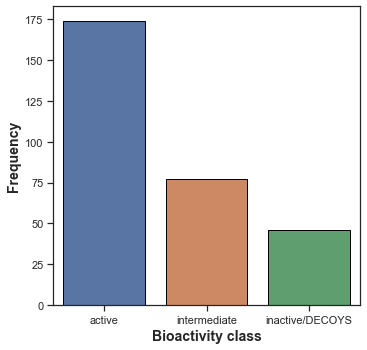

In [20]:
plt.figure(figsize=(5.5, 5.5))

sns.countplot(x='class', data=df_clean_smiles, edgecolor='black')

plt.xlabel('Bioactivity class', fontsize=14, fontweight='bold')
plt.ylabel('Frequency', fontsize=14, fontweight='bold')

plt.savefig('plot_bioactivity_class.pdf')

### 6. Make a list of smiles for the decoy molecules:

In [21]:
df_clean_smiles
a= list(df['canonical_smiles'])
b = '\n'.join(map(str, a))




In [22]:
print(b)

Cc1ccccc1COc1ccc(S(=O)(=O)[C@@H]2CCOC[C@]2(O)C(=O)NO)cc1
Cc1cccc(COc2ccc(S(=O)(=O)[C@@H]3CCOC[C@]3(O)C(=O)NO)cc2)c1
Cc1ccc(COc2ccc(S(=O)(=O)[C@@H]3CCOC[C@]3(O)C(=O)NO)cc2)cc1
O=C(NO)[C@@]1(O)COCC[C@H]1S(=O)(=O)c1ccc(OCc2ccccc2Cl)cc1
O=C(NO)[C@@]1(O)COCC[C@H]1S(=O)(=O)c1ccc(OCc2cccc(Cl)c2)cc1
O=C(NO)[C@@]1(O)COCC[C@H]1S(=O)(=O)c1ccc(OCc2ccc(Cl)cc2)cc1
O=C(NO)[C@@]1(O)COCC[C@H]1S(=O)(=O)c1ccc(OCc2ccccc2C(F)(F)F)cc1
O=C(NO)[C@@]1(O)COCC[C@H]1S(=O)(=O)c1ccc(OCc2cccc(Cl)c2Cl)cc1
O=C(NO)[C@@]1(O)COCC[C@H]1S(=O)(=O)c1ccc(OCc2ccc(Cl)cc2Cl)cc1
O=C(NO)[C@@]1(O)COCC[C@H]1S(=O)(=O)c1ccc(OCc2cc(Cl)ccc2Cl)cc1
O=C(NO)[C@@]1(O)COCC[C@H]1S(=O)(=O)c1ccc(OCc2c(Cl)cccc2Cl)cc1
Cc1ccc(COc2ccc(S(=O)(=O)[C@@H]3CCOC[C@]3(O)C(=O)NO)cc2)c(C)c1
Cc1ccc(C)c(COc2ccc(S(=O)(=O)[C@@H]3CCOC[C@]3(O)C(=O)NO)cc2)c1
Cc1cccc(C)c1COc1ccc(S(=O)(=O)[C@@H]2CCOC[C@]2(O)C(=O)NO)cc1
Cc1ccccc1Oc1ccc(S(=O)(=O)[C@@H]2CCOC[C@]2(O)C(=O)NO)cc1
Cc1cccc(Oc2ccc(S(=O)(=O)[C@@H]3CCOC[C@]3(O)C(=O)NO)cc2)c1
Cc1ccc(Oc2ccc(S(=O)(=O)[C@@H]3CCOC[C@

### 7. Conversion of smiles into 3D structures:
>< All the smiles are saved in a file name "decoy_smiles.smi" was provided to the openbabel input file formal and the output was >< three-dimensional stuctures of these chemical compounds.
----------------------------------------------------------------
>< obabel -i smi all_smiles.smi -o sdf -O decoys.sdf -m -h --gen3d
-------------------------------------------------------------------
>< the 3D structures were converted into a single file using openbabel using the command:
-----------------------------------------------------------------------
>< obabel -i *.sdf -o sdf -O all_decoy_molecules.sdf
----------------------------------------------------------------------
>< where, -i stands for input format, -o stands for the output format, -m stands for multiple files as output, -h stands for add hydrogen molecule, --gen3d stands for generate 3d molecules and -O stans for an output file name.

### Credits:
This work is inpired by Chanin Nantasenamat [*dataprofessor*](https://github.com/dataprofessor/)
, Thankful to the vast chemical space maintained and hosted by ChEMBL database [*ChEMBL Database*](https://www.ebi.ac.uk/chembl/), GOLD software for molecular interaction studies by [*CCDC*](https://www.google.com/search?client=firefox-b-d&q=ccdc+gold), [*openbabel*](http://openbabel.org/wiki/Main_Page) for necessary file conversions, [*pROC*](https://www.google.com/url?sa=t&rct=j&q=&esrc=s&source=web&cd=&ved=2ahUKEwiX25nb04T4AhV173MBHQvECdIQFnoECAoQAQ&url=https%3A%2F%2Fcran.r-project.org%2Fweb%2Fpackages%2FpROC%2FpROC.pdf&usg=AOvVaw2O990-P_OBaiJBJ9Z4k7Lq/) package of R, [*random-forest*](https://www.google.com/url?sa=t&rct=j&q=&esrc=s&source=web&cd=&cad=rja&uact=8&ved=2ahUKEwiT__yC1IT4AhUxILcAHf4CCN0QFnoECAoQAQ&url=https%3A%2F%2Fcran.r-project.org%2Fweb%2Fpackages%2FrandomForest%2FrandomForest.pdf&usg=AOvVaw1XTVXeEGEtNbNpGXVbhX16/) package of R, [*R-Studio*](https://www.rstudio.com/).

### Acknowledgement:

> Department of Biotechnology and Bioinformatics, North-Eastern Hill University, Shillong, Dr. Atanu Bhattacharjee for the necessary Knowledge, motivation and constant support, Chanin Nantasenamat for the python tutorials in relevance to Biological sciences.
